In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
df=pd.read_csv('k means.csv')
df.head()

,no,age,amount
0,c1,20,500
1,c2,40,1000
2,c3,30,800
3,c4,18,300
4,c5,28,1200


C:\Users\01\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


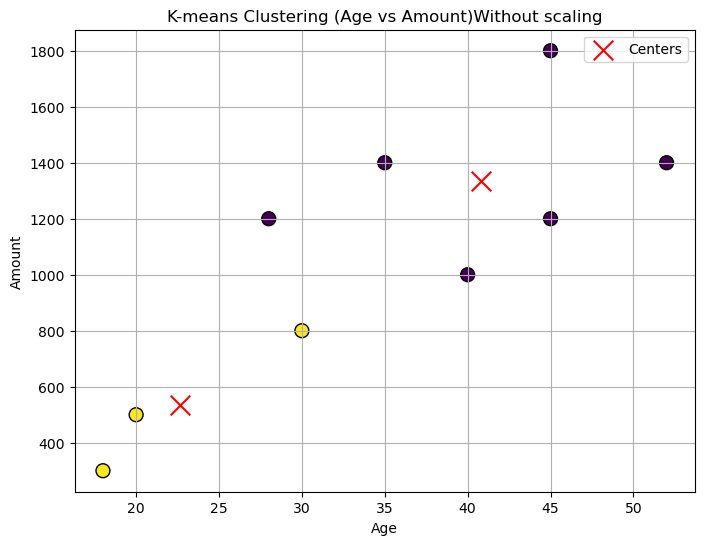

   no  age  amount  Cluster
0  c1   20     500        1
1  c2   40    1000        0
2  c3   30     800        1
3  c4   18     300        1
4  c5   28    1200        0
5  c6   35    1400        0
6  c7   45    1800        0
7  c8   52    1400        0
8  c9   45    1200        0


In [9]:
x=df[['age','amount']]
kmeans=KMeans(n_clusters=2,random_state=0)#apply kmeans clustering with 2 clusters(without scaling)
kmeans.fit(x)

#predicting the cluster labels
labels=kmeans.predict(x)

#adding the cluster labels to the original dataframe
df['Cluster']=labels

#visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(df['age'],df['amount'],c=df['Cluster'],cmap='viridis',s=100,edgecolor='k')

#mark the cluster centers
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',marker='x',s=200,label='Centers')
plt.title('K-means Clustering (Age vs Amount)Without scaling')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()
#Dispaly the dataframe with clusters
print(df)


C:\Users\01\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


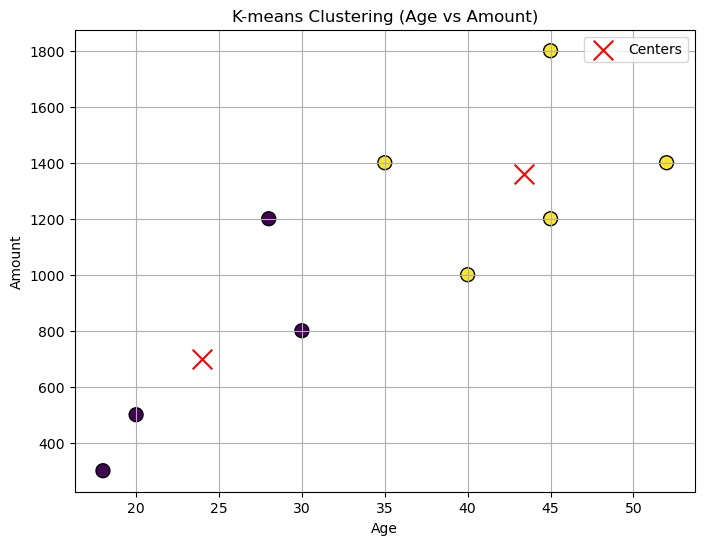

   no  age  amount  Cluster
0  c1   20     500        0
1  c2   40    1000        1
2  c3   30     800        0
3  c4   18     300        0
4  c5   28    1200        0
5  c6   35    1400        1
6  c7   45    1800        1
7  c8   52    1400        1
8  c9   45    1200        1


In [13]:
#standardlizing the data (optional,but recommended)
x=df[['age','amount']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
#apply Kmeans clustering with 2 clusters
kmeans=KMeans(n_clusters=2,random_state=0)#apply kmeans clustering with 2 clusters(without scaling)
kmeans.fit(x_scaled)

#predicting the cluster labels
labels=kmeans.predict(x_scaled)

#adding the cluster labels to the original dataframe
df['Cluster']=labels
plt.figure(figsize=(8,6))
plt.scatter(df['age'],df['amount'],c=df['Cluster'],cmap='viridis',s=100,edgecolor='k')

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0]*scaler.scale_[0]+scaler.mean_[0],centers[:,1]*scaler.scale_[1]+scaler.mean_[1],c='red',marker='x',s=200,label='Centers')
plt.title('K-means Clustering (Age vs Amount)')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()
print(df)



